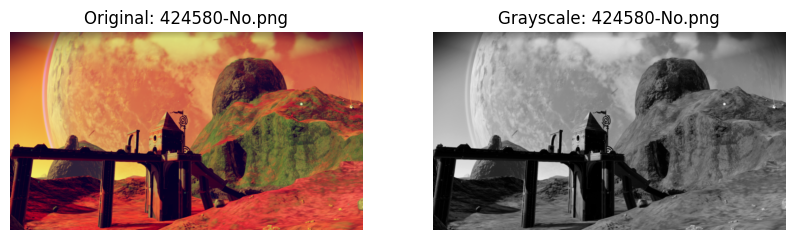

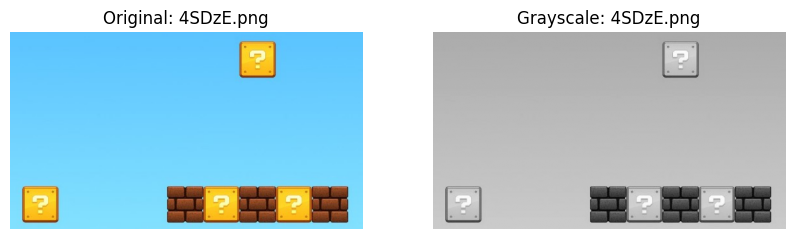

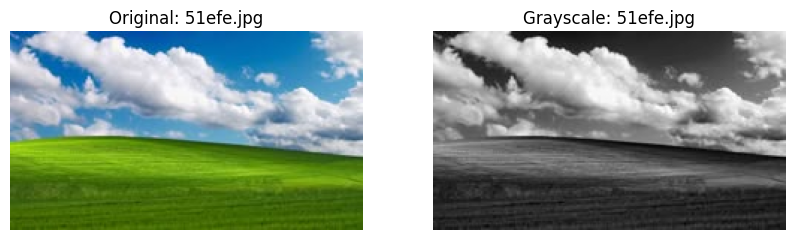

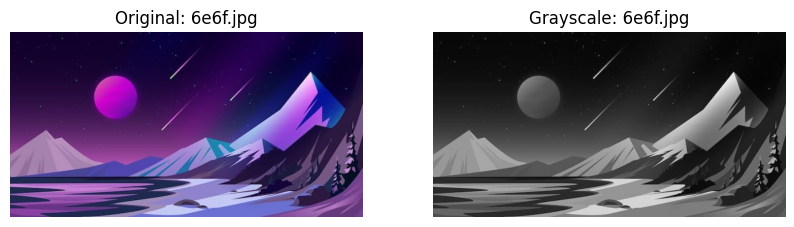

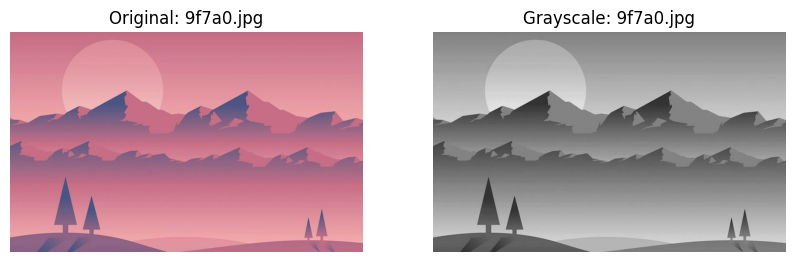

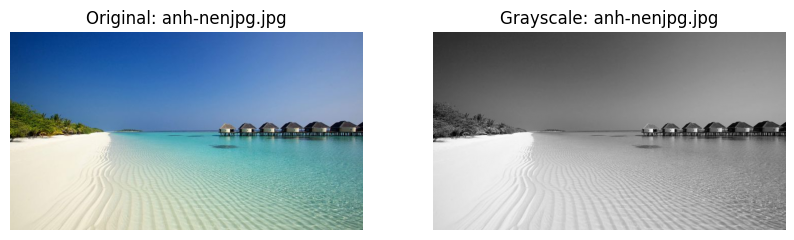

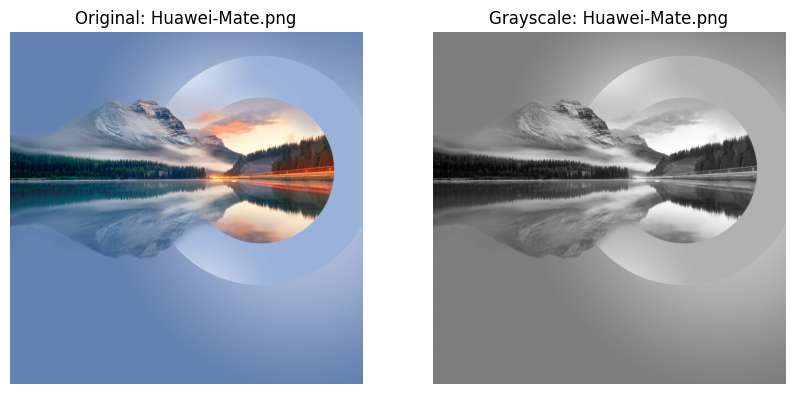

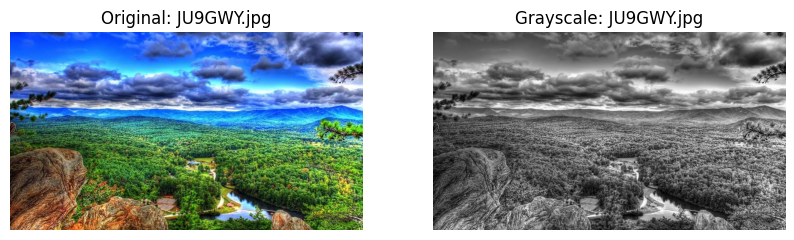

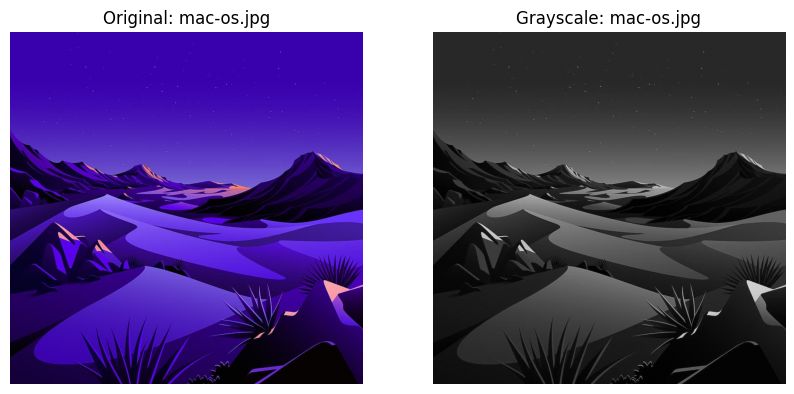

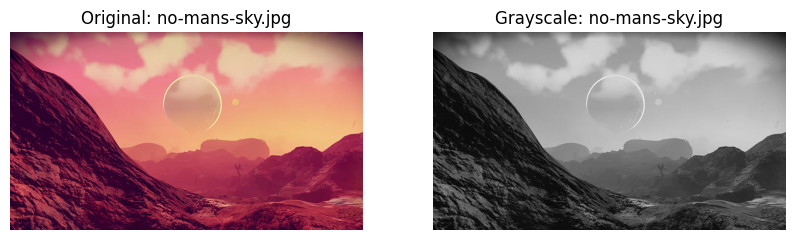

✅ Grayscale matrices saved to grayscale_matrices.xlsx


In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configure paths
input_folder = "input_images"  # Folder containing input images
output_csv = "grayscale_matrices.xlsx"  # Output Excel file
EXCEL_MAX_ROWS = 1048576  # Max number of rows Excel supports

# Create input folder if it doesn't exist
os.makedirs(input_folder, exist_ok=True)

# Get list of image files in the input folder
image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
image_files = image_files[:10]  # Limit to first 10 images

# Prepare data for Excel
excel_data = {}

# Process each image
for img_file in image_files:
    img_path = os.path.join(input_folder, img_file)

    # Open and convert to grayscale
    original_img = Image.open(img_path).convert("RGB")
    gray_img = original_img.convert("L")

    # Convert to NumPy array
    gray_np = np.array(gray_img)
    flattened = gray_np.flatten()

    if len(flattened) > EXCEL_MAX_ROWS:
        print(f"⚠️ Skipping {img_file}: too many pixels ({len(flattened)} > {EXCEL_MAX_ROWS})")
        continue  # Skip this image
    else:
        # Store grayscale matrix in Excel data
        excel_data[img_file] = flattened.tolist()

        # Display images side by side
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.title(f"Original: {img_file}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(gray_img, cmap='gray')
        plt.title(f"Grayscale: {img_file}")
        plt.axis('off')

        plt.show()

# Write to Excel
if excel_data:
    try:
        with pd.ExcelWriter(output_csv) as writer:
            for img_file, data in excel_data.items():
                df = pd.DataFrame(data, columns=["Grayscale Value"])
                safe_sheet_name = os.path.splitext(img_file)[0][:31]  # Excel sheet names max length = 31
                df.to_excel(writer, sheet_name=safe_sheet_name, index=False)
        print(f"✅ Grayscale matrices saved to {output_csv}")
    except Exception as e:
        print(f"❌ Failed to save Excel file: {e}")
else:
    print("❌ No valid images to process.")